In [1]:
%pip install pymongo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pymongo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
client = pymongo.MongoClient('mongodb://localhost:27017/')

db = client.get_database('airbnb')
coll = db['data']


doc = list(coll.find({}))
client.close()

In [4]:
df = pd.DataFrame(doc)

df.head()

,_id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,guests_included,images,host,address,availability,review_scores,reviews,weekly_price,monthly_price,reviews_per_month
0,1003530,https://www.airbnb.com/rooms/1003530,New York City - Upper West Side Apt,,"Murphy bed, optional second bedroom available....","Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,"My cat, Samantha, are in and out during the su...","Conveniently located near 1, 2, 3, B & C subwa...",New York City!,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '454250', 'host_url': 'https://www...","{'street': 'New York, NY, United States', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '4351675', 'date': '2013-04-29 04:00:...",NaN,NaN,NaN
1,10133554,https://www.airbnb.com/rooms/10133554,Double and triple rooms Blue mosque,,We are on the central city Blue mosque 5 minu...,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,,Tram 5 minutes metro 10 minutes Bus 10 minutes,"We have bathroom,wc,İnternet in rooms and unde...",...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '52004703', 'host_url': 'https://w...","{'street': 'Fatih , İstanbul, Turkey', 'suburb...","{'availability_30': 30, 'availability_60': 60,...","{'review_scores_accuracy': 9, 'review_scores_c...","[{'_id': '149469150', 'date': '2017-05-04 04:0...",NaN,NaN,NaN
2,10059872,https://www.airbnb.com/rooms/10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",,"Clean, fully furnish, Spacious 1 bedroom flat ...",,,,,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51624384', 'host_url': 'https://w...","{'street': 'Hong Kong, Hong Kong Island, Hong ...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '56904633', 'date': '2015-12-19 05:00...",5000.0,NaN,NaN
3,10084023,https://www.airbnb.com/rooms/10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,"The house is old fashion type, and paint the w...",House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...",Deposit of $1000 will be charged and will retu...,"Close to 3 different MTR Station, Sham shui Po...","Living Room , Kitchen and Toilet, All cooking ...",...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '51744313', 'host_url': 'https://w...","{'street': 'Hong Kong , 九龍, Hong Kong', 'subur...","{'availability_30': 14, 'availability_60': 24,...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '57191745', 'date': '2015-12-22 05:00...",1350.0,5000.0,NaN
4,10091713,https://www.airbnb.com/rooms/10091713,Surry Hills Studio - Your Perfect Base in Sydney,"This spacious, light filled studio has everyth...",Comfortable studio with a great layout. The ba...,"This spacious, light filled studio has everyth...",Surry Hills is a vibrant eclectic community an...,"WiFi, Apple TV with Netflix App (for use with ...",Travel Card 'Opal' travel cards work on all Sy...,You have full use of the entire studio and com...,...,1,"{'thumbnail_url': '', 'medium_url': '', 'pictu...","{'host_id': '13764143', 'host_url': 'https://w...","{'street': 'Surry Hills, NSW, Australia', 'sub...","{'availability_30': 0, 'availability_60': 0, '...","{'review_scores_accuracy': 10, 'review_scores_...","[{'_id': '123549502', 'date': '2016-12-29 05:0...",NaN,NaN,NaN


In [5]:
df.shape

(5555, 42)

In [6]:
df.columns

Index(['_id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'property_type', 'room_type', 'bed_type',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'guests_included', 'images', 'host', 'address',
       'availability', 'review_scores', 'reviews', 'weekly_price',
       'monthly_price', 'reviews_per_month'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    5555 non-null   object 
 1   listing_url            5555 non-null   object 
 2   name                   5555 non-null   object 
 3   summary                5555 non-null   object 
 4   space                  5555 non-null   object 
 5   description            5555 non-null   object 
 6   neighborhood_overview  5555 non-null   object 
 7   notes                  5555 non-null   object 
 8   transit                5555 non-null   object 
 9   access                 5555 non-null   object 
 10  interaction            5555 non-null   object 
 11  house_rules            5555 non-null   object 
 12  property_type          5555 non-null   object 
 13  room_type              5555 non-null   object 
 14  bed_type               5555 non-null   object 
 15  mini

In [8]:
# Convert 'security_deposit' to Python float
df['security_deposit'] = df['security_deposit'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'security_deposit'
mean_security_deposit = df['security_deposit'].mean()
df['security_deposit'] = df['security_deposit'].fillna(mean_security_deposit)

# Convert 'security_deposit' to numeric (integer) type
df['security_deposit'] = df['security_deposit'].astype(int)

print(df['security_deposit'].head())

0      0
1    509
2    509
3      0
4    300
Name: security_deposit, dtype: int32


In [9]:
# Convert 'cleaning_fee' to Python float
df['cleaning_fee'] = df['cleaning_fee'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'cleaning_fee'
mean_cleaning_fee = df['cleaning_fee'].mean()
df['cleaning_fee'] = df['cleaning_fee'].fillna(mean_cleaning_fee)

# Convert 'cleaning_fee' to numeric (integer) type
df['cleaning_fee'] = df['cleaning_fee'].astype(int)

print(df['cleaning_fee'].head())

0    135
1     94
2     94
3     50
4     50
Name: cleaning_fee, dtype: int32


In [10]:
# Convert 'weekly_price' to Python float
df['weekly_price'] = df['weekly_price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'weekly_price'
mean_weekly_price = df['weekly_price'].mean()
df['weekly_price'] = df['weekly_price'].fillna(mean_weekly_price)

# Convert 'weekly_price' to numeric (integer) type
df['weekly_price'] = df['weekly_price'].astype(int)

print(df['weekly_price'].head())

0    1530
1    1530
2    5000
3    1350
4    1530
Name: weekly_price, dtype: int32


In [11]:
# Convert 'beds' to Python float
df['beds'] = df['beds'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'beds'
median_beds = df['beds'].median()
df['beds'] = df['beds'].fillna(median_beds)

# Convert 'beds' to numeric (integer) type
df['beds'] = df['beds'].astype(int)

df['beds'] = df['beds'].astype(str)

print(df['beds'].head())

0    1
1    2
2    2
3    1
4    1
Name: beds, dtype: object


In [12]:
# Convert 'bathrooms' to Python float
df['bathrooms'] = df['bathrooms'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Fill NaN with the mean of 'bathrooms'
median_bathrooms = df['bathrooms'].median()
df['bathrooms'] = df['bathrooms'].fillna(median_bathrooms)

# Convert 'bathrooms' to numeric (integer) type
df['bathrooms'] = df['bathrooms'].astype(int)

df['bathrooms'] = df['bathrooms'].astype(str)

print(df['bathrooms'].head())

0    1
1    1
2    1
3    1
4    1
Name: bathrooms, dtype: object


In [13]:
# Convert 'minimum_nights' to Python float
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Convert 'minimum_nights' to numeric (integer) type
df['minimum_nights'] = df['minimum_nights'].astype(int)

print(df['minimum_nights'].head())

0    12
1     1
2     4
3     1
4    10
Name: minimum_nights, dtype: int32


In [14]:
# Convert 'maximum_nights' to Python float
df['maximum_nights'] = df['maximum_nights'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Convert 'maximum_nights' to numeric (integer) type
df['maximum_nights'] = df['maximum_nights'].astype(int)

print(df['maximum_nights'].head())

0     360
1    1125
2      20
3     500
4      21
Name: maximum_nights, dtype: int32


In [15]:
# Convert 'price' to Python float
df['price'] = df['price'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Convert 'price' to numeric (integer) type
df['price'] = df['price'].astype(int)

df['price'] = df['price'].astype(str)

print(df['price'].head())

0    135
1    121
2    699
3    181
4    181
Name: price, dtype: object


In [16]:
df.isnull().sum()

_id                         0
listing_url                 0
name                        0
summary                     0
space                       0
description                 0
neighborhood_overview       0
notes                       0
transit                     0
access                      0
interaction                 0
house_rules                 0
property_type               0
room_type                   0
bed_type                    0
minimum_nights              0
maximum_nights              0
cancellation_policy         0
last_scraped                0
calendar_last_scraped       0
first_review             1388
last_review              1388
accommodates                0
bedrooms                    5
beds                        0
number_of_reviews           0
bathrooms                   0
amenities                   0
price                       0
security_deposit            0
cleaning_fee                0
extra_people                0
guests_included             0
images    

In [17]:
# Convert 'extra_people' to Python float
df['extra_people'] = df['extra_people'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Convert 'price' to numeric (integer) type
df['extra_people'] = df['extra_people'].astype(int)

df['extra_people'] = df['extra_people'].astype(str)

print(df['extra_people'].head())

0      0
1      0
2      0
3    100
4      0
Name: extra_people, dtype: object


In [18]:
# Convert 'guests_included' to Python float
df['guests_included'] = df['guests_included'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

# Convert 'guests_included' to numeric (integer) type
df['guests_included'] = df['guests_included'].astype(int)

df['guests_included'] = df['guests_included'].astype(str)

print(df['guests_included'].head())

0    1
1    1
2    1
3    1
4    1
Name: guests_included, dtype: object


In [19]:
# Extract latitude and longitude from the 'address' column
df['latitude'] = df['address'].apply(lambda x: x.get('location', {}).get('coordinates', [None, None])[1])
df['longitude'] = df['address'].apply(lambda x: x.get('location', {}).get('coordinates', [None, None])[0])

# Convert latitude and longitude to float data type
df[['latitude', 'longitude']] = df[['latitude', 'longitude']].astype(float)

# Print the DataFrame to verify the changes
print(df.head())

        _id                            listing_url   
0   1003530   https://www.airbnb.com/rooms/1003530  \
1  10133554  https://www.airbnb.com/rooms/10133554   
2  10059872  https://www.airbnb.com/rooms/10059872   
3  10084023  https://www.airbnb.com/rooms/10084023   
4  10091713  https://www.airbnb.com/rooms/10091713   

                                               name   
0               New York City - Upper West Side Apt  \
1               Double and triple rooms Blue mosque   
2                Soho Cozy, Spacious and Convenient   
3                 City center private room with bed   
4  Surry Hills Studio - Your Perfect Base in Sydney   

                                             summary   
0                                                     \
1                                                      
2  Clean, fully furnish, Spacious 1 bedroom flat ...   
3  House is located 5mins walk from Sham Shui Po ...   
4  This spacious, light filled studio has everyth...   

       

In [20]:
# Extract country and country_code from the 'address' column
df['country'] = df['address'].apply(lambda x: x.get('country', None))
df['country_code'] = df['address'].apply(lambda x: x.get('country_code', None))

# Print the DataFrame to verify the changes
print(df.head())

        _id                            listing_url   
0   1003530   https://www.airbnb.com/rooms/1003530  \
1  10133554  https://www.airbnb.com/rooms/10133554   
2  10059872  https://www.airbnb.com/rooms/10059872   
3  10084023  https://www.airbnb.com/rooms/10084023   
4  10091713  https://www.airbnb.com/rooms/10091713   

                                               name   
0               New York City - Upper West Side Apt  \
1               Double and triple rooms Blue mosque   
2                Soho Cozy, Spacious and Convenient   
3                 City center private room with bed   
4  Surry Hills Studio - Your Perfect Base in Sydney   

                                             summary   
0                                                     \
1                                                      
2  Clean, fully furnish, Spacious 1 bedroom flat ...   
3  House is located 5mins walk from Sham Shui Po ...   
4  This spacious, light filled studio has everyth...   

       

In [21]:
#Extract review_rating safely
df['review_rating'] = df['review_scores'].apply(lambda x: x['review_scores_rating'] if isinstance(x, dict) and 'review_scores_rating' in x else None)

# Convert 'review_rating' to numeric (integer) type, handling NaN values
df['review_rating'] = pd.to_numeric(df['review_rating'], errors='coerce')

# Fill NaN values with a default value (e.g., -1) or any other appropriate value
df['review_rating'].fillna(-1, inplace=True)

# Convert 'review_rating' to integers
df['review_rating'] = df['review_rating'].astype(int)

# Convert 'review_rating' to string if needed
df['review_rating'] = df['review_rating'].astype(str)

# Print the DataFrame to verify the changes
print(df.head())

        _id                            listing_url   
0   1003530   https://www.airbnb.com/rooms/1003530  \
1  10133554  https://www.airbnb.com/rooms/10133554   
2  10059872  https://www.airbnb.com/rooms/10059872   
3  10084023  https://www.airbnb.com/rooms/10084023   
4  10091713  https://www.airbnb.com/rooms/10091713   

                                               name   
0               New York City - Upper West Side Apt  \
1               Double and triple rooms Blue mosque   
2                Soho Cozy, Spacious and Convenient   
3                 City center private room with bed   
4  Surry Hills Studio - Your Perfect Base in Sydney   

                                             summary   
0                                                     \
1                                                      
2  Clean, fully furnish, Spacious 1 bedroom flat ...   
3  House is located 5mins walk from Sham Shui Po ...   
4  This spacious, light filled studio has everyth...   

       

In [22]:
columns_to_drop = [
    'listing_url', 'space', 'neighborhood_overview', 'notes', 'transit',
    'access', 'interaction', 'house_rules', 'bed_type', 'cancellation_policy',
    'first_review', 'last_review', 'images', 'host', 'reviews', 'reviews_per_month'
]

# Drop only the existing columns
columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]

# Drop the existing columns
df.drop(columns=columns_to_drop_existing, axis=1, inplace=True)

In [23]:
df.shape

(5555, 31)

In [24]:
df.columns

Index(['_id', 'name', 'summary', 'description', 'property_type', 'room_type',
       'minimum_nights', 'maximum_nights', 'last_scraped',
       'calendar_last_scraped', 'accommodates', 'bedrooms', 'beds',
       'number_of_reviews', 'bathrooms', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'guests_included',
       'address', 'availability', 'review_scores', 'weekly_price',
       'monthly_price', 'latitude', 'longitude', 'country', 'country_code',
       'review_rating'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    5555 non-null   object 
 1   name                   5555 non-null   object 
 2   summary                5555 non-null   object 
 3   description            5555 non-null   object 
 4   property_type          5555 non-null   object 
 5   room_type              5555 non-null   object 
 6   minimum_nights         5555 non-null   int32  
 7   maximum_nights         5555 non-null   int32  
 8   last_scraped           5555 non-null   object 
 9   calendar_last_scraped  5555 non-null   object 
 10  accommodates           5555 non-null   int64  
 11  bedrooms               5550 non-null   float64
 12  beds                   5555 non-null   object 
 13  number_of_reviews      5555 non-null   int64  
 14  bathrooms              5555 non-null   object 
 15  amen

In [26]:
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       minimum_nights  maximum_nights  accommodates     bedrooms   
count     5555.000000    5.555000e+03   5555.000000  5550.000000  \
mean         5.564356    1.382776e+06      3.505851     1.411712   
std         22.613861    5.256920e+07      2.297019     1.041942   
min          1.000000    1.000000e+00      1.000000     0.000000   
25%          1.000000    5.900000e+01      2.000000     1.000000   
50%          2.000000    1.125000e+03      3.000000     1.000000   
75%          3.000000    1.125000e+03      4.000000     2.000000   
max       1250.000000    2.147484e+09     16.000000    20.000000   

       number_of_reviews  security_deposit  cleaning_fee  weekly_price   
count        5555.000000       5555.000000   5555.000000   5555.000000  \
mean           27.606481        509.268947     94.054185   1530.116112   
std            49.798376       1260.577297     93.792607   1141.500769   
min             0.000000          0.000000      0.000000     60.000000 

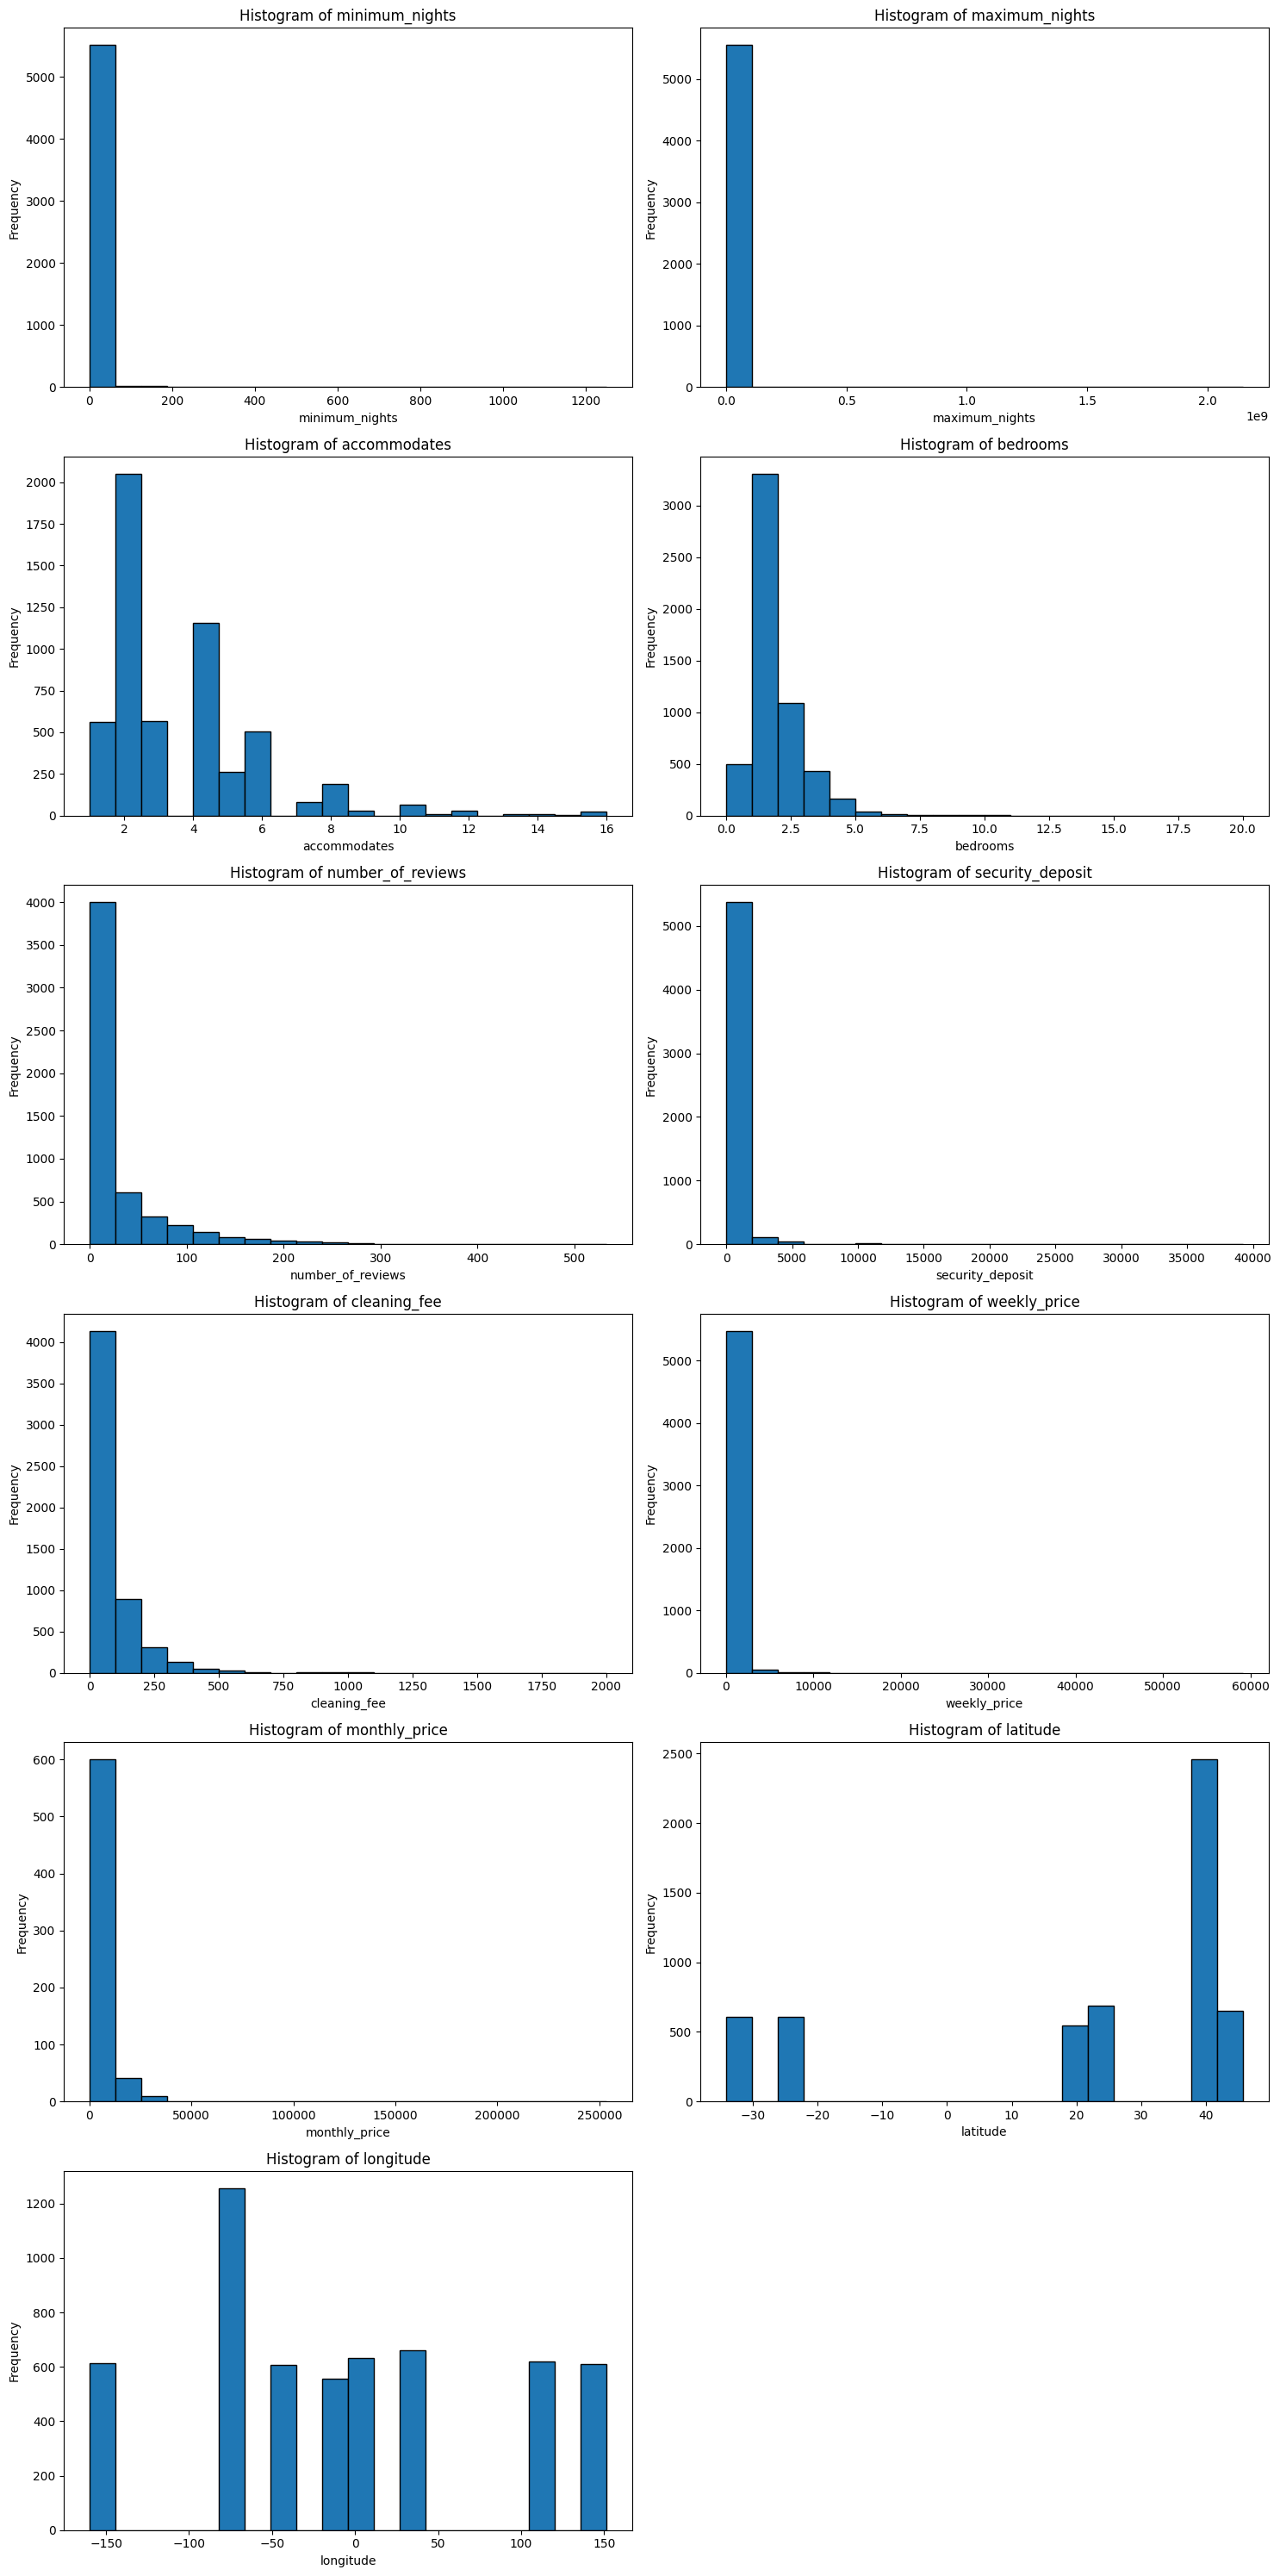

In [27]:
# Plot histogram for all numerical columns using subplots
import math

numerical_columns = df.select_dtypes(include='number').columns

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_columns)
num_rows = int(math.ceil(num_cols / 2))  # Assuming 2 columns per row

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten axes if num_cols is odd
if num_cols % 2 != 0:
    axes[-1, -1].axis('off')

# Plot histograms
for i, col in enumerate(numerical_columns):
    row_idx = i // 2
    col_idx = i % 2

    axes[row_idx, col_idx].hist(df[col], bins=20, edgecolor='black')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Histogram of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 10 Property Types available')

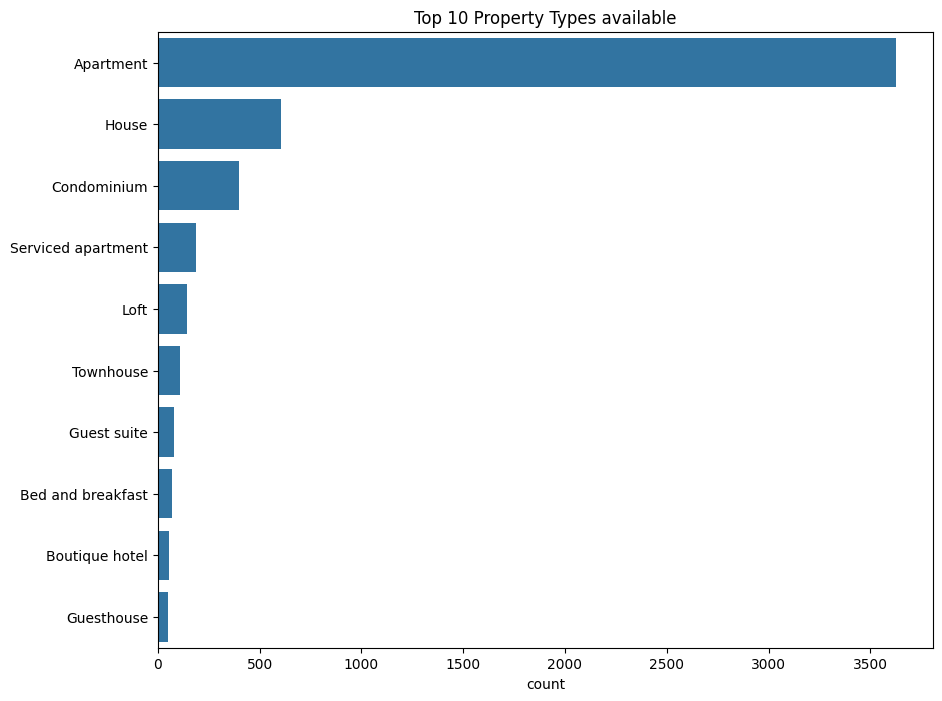

In [28]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,y=df.property_type.values,order=df.property_type.value_counts().index[:10])
ax.set_title("Top 10 Property Types available")

Text(0.5, 1.0, 'Total Listings in each Room Type')

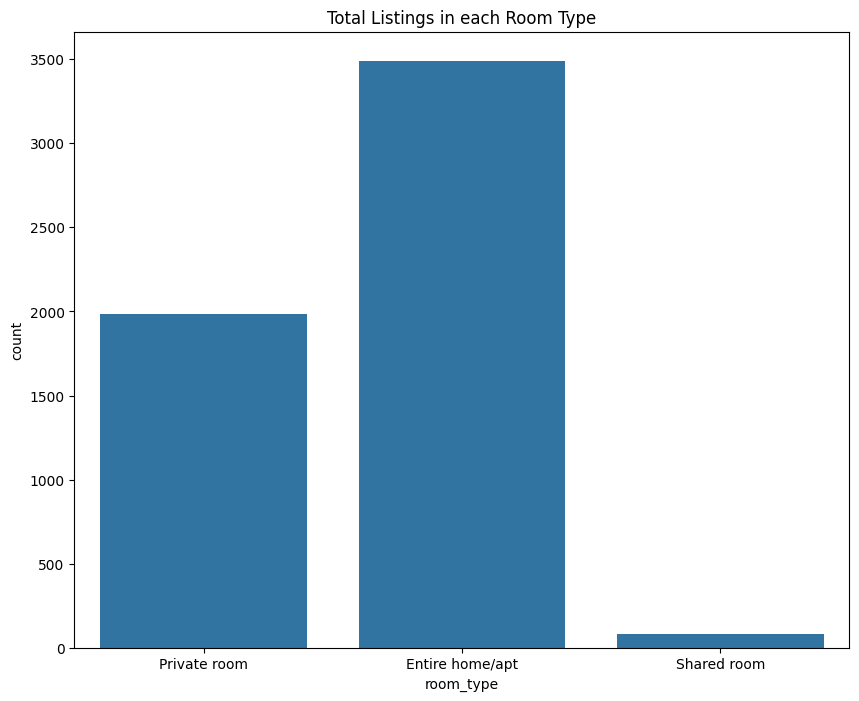

In [29]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df,x=df.room_type)
ax.set_title("Total Listings in each Room Type")

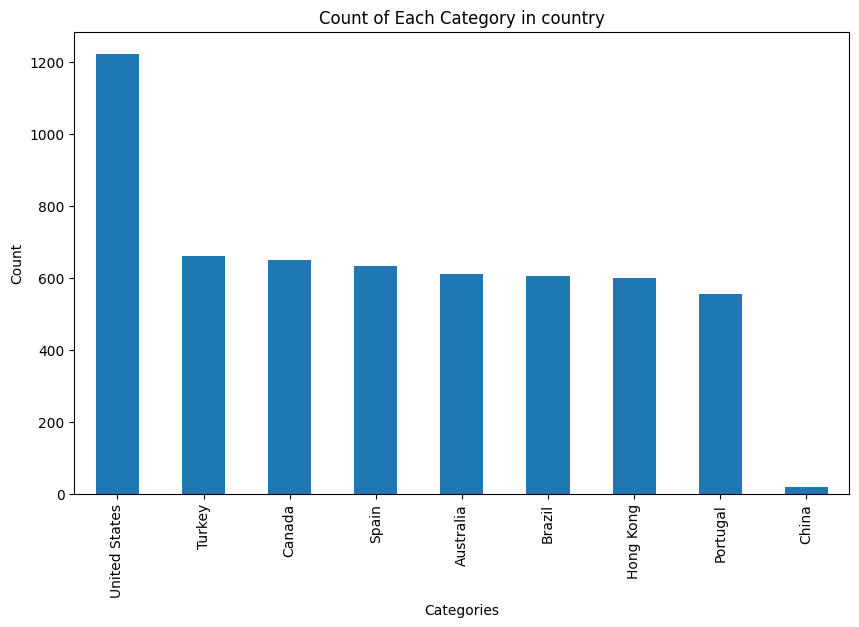

In [30]:
# Specify the categorical columns you want to plot
categorical_columns_of_interest = ['country']  # Add your column names

# Plot count plot for the specified categorical columns
for col in categorical_columns_of_interest:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar')
        plt.xlabel('Categories')
        plt.ylabel('Count')
        plt.title(f'Count of Each Category in {col}')
        plt.show()

In [31]:
df.to_csv('cleaned_airbnb_data.csv', index=False)